In [1]:
import math
import json
import pandas as pd
import numpy as np
from pylab import *
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
from matplotlib.collections import PatchCollection

In [62]:
def calc_cost(distance):
    """
    determine the cost of the movement according to the rules:
    Each swing costs the particle $D^-2, where D is the straight-line distance of the length of rope used for that particular swing.
    """
    return round(pow(distance, -2),4)

def calc_distance(x1,y1,x2,y2): 
    """
    determine the distance between 2 points on a coordinate plane
    """
    return round(math.sqrt((x2 - x1)**2 + (y2 - y1)**2),4)

def calc_slope(x1,y1,x2,y2):
    if x1 == x2 and y1 == y2:
        return "NaL"
    elif x1 == x2:
        if y1 < y2:
            return "vertical_pos"
        elif y1 > y2:
            return "vertical_neg"
    elif y1 == y2:
        if x1 < x2:
            return "horizontal_pos"
        elif x1 > x2:
            return "horizontal_neg"
    else:
        return round((y2-y1)/(x2-x1),4)
    
def plot_path(x1,y1,x2,y2, color="b"):
    # plot points
    ax.plot(x1, y1, color+'o')
    ax.plot(x2, y2, color+'o')
    # plot line
    ax.plot([x1, x2],[y1, y2], color+'-')

def lattice_intercepts(origin, radius):
    x = origin[0]
    y = origin[1]
    r_2 = pow(radius,2)
    xy_2 = pow(x,2) + pow(y,2)
    lattice_intercepts = []
    i = 0
    while i <= xy_2:
        j = 0
        while j <= xy_2:
            if (pow((i - x),2) + pow((j - y),2) == r_2):
                lattice_intercepts.append((i,j))
            j = j + 1
        i = i + 1
    return lattice_intercepts

def calc_angle(p0, p1, p2):
    """
    calculate the angle (in degrees) for vertex p0 p1 p2 
    """
    v0 = np.array(p0) - np.array(p1)
    v1 = np.array(p2) - np.array(p1)
    angle = np.math.atan2(np.linalg.det([v0,v1]),np.dot(v0,v1))
    return round(np.degrees(angle),4)

def excel_col(col):
    quot, rem = divmod(col-1,26)
    return excel_col(quot) + chr(rem+ord('A')) if col!=0 else ''

toss: (0.0,0.0) => (0.0,10.0) | d:10.0 | s:vertical_pos
    g_pos_stack: (4.0, 7.0, 5.0, -0.75, 53.1301)
    g_neg_stack: (0, 0)
    x2: 0.0
    y2: 10.0
    d2: 10.0
    lps: [(0, 0), (0, 20), (6, 2), (6, 18), (8, 4), (8, 16), (10, 10)]
___________
        swing: (4.0,7.0) => (3.0,10.0) | d:3.1623 | g:-3.0°
        swing: (4.0,7.0) => (4.0,7.0) | d:0.0 | g:NaL°
        swing: (4.0,7.0) => (7.0,7.0) | d:3.0 | g:horizontal_pos°
_____


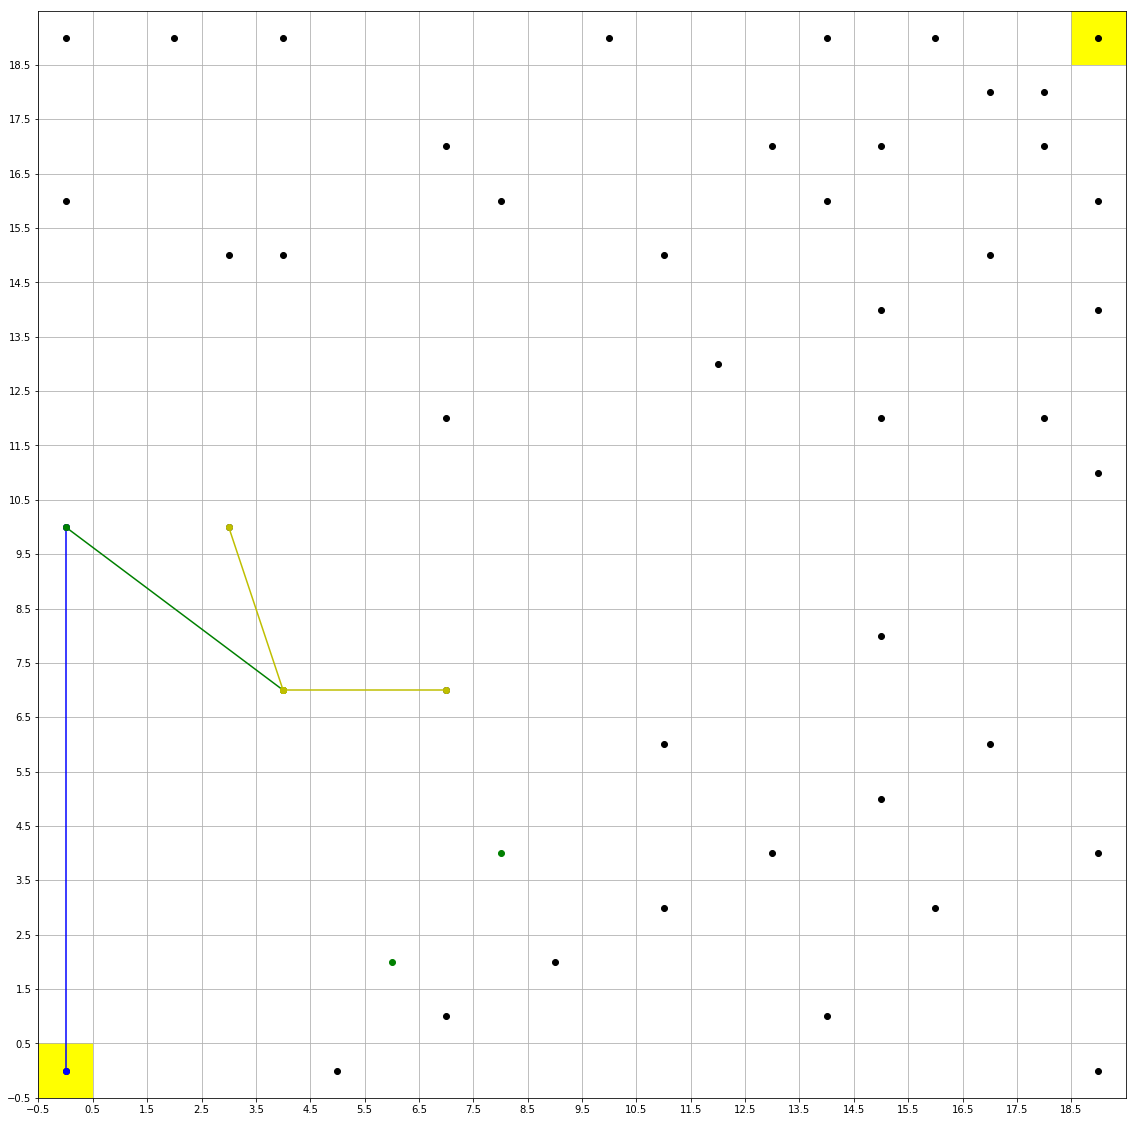

In [66]:
coords = [(0.0, 0.0), (2.0, 19.0), (4.0, 19.0), (10.0, 19.0), (14.0, 19.0), (16.0, 19.0), (19.0, 19.0), (17.0, 18.0), (18.0, 18.0), (7.0, 17.0), (13.0, 17.0), (15.0, 17.0), (18.0, 17.0), (0.0, 16.0), (8.0, 16.0), (14.0, 16.0), (19.0, 16.0), (3.0, 15.0), (4.0, 15.0), (11.0, 15.0), (17.0, 15.0), (15.0, 14.0), (19.0, 14.0), (12.0, 13.0), (7.0, 12.0), (15.0, 12.0), (18.0, 12.0), (19.0, 11.0), (0.0, 10.0), (3.0, 10.0), (15.0, 8.0), (4.0, 7.0), (7.0, 7.0), (11.0, 6.0), (17.0, 6.0), (15.0, 5.0), (13.0, 4.0), (19.0, 4.0), (11.0, 3.0), (16.0, 3.0), (9.0, 2.0), (7.0, 1.0), (14.0, 1.0), (0.0, 19.0), (5.0, 0.0), (19.0, 0.0)]
graph = {} 

figure(figsize=(20,20))
ax=subplot(aspect='equal')
ax.set_xticks(np.arange(-.5, 19.5, 1))
ax.set_yticks(np.arange(-.5, 19.5, 1))

# plot all coordinates
[ax.plot(i[0], i[1], 'ko') for i in coords]

# ax.plot(4.6098,0.3902, 'go')

# plot start and finish
ax.fill_between([-.5,.5], -.5, .5, facecolor='yellow')
ax.fill_between([18.5,19.5], 18.5, 19.5, facecolor='yellow')

# ax.fill_between([15,16], 19, 20, facecolor='red')
# ax.fill_between([16,17], 18, 19, facecolor='red')
# ax.fill_between([17,18], 17, 18, facecolor='red')
# ax.fill_between([18,19], 16, 17, facecolor='red')
# ax.fill_between([19,20], 15, 16, facecolor='red')

xlim(-.5,19.5)
ylim(-.5,19.5)

# build the graph
for i in range(len(coords)):
    x1 = coords[i][0]
    y1 = coords[i][1]
    # first toss START
    # x1 = 0
    # y1 = 0
    viable_toss_stack = {}
    toss = []
    toss_length = 0
    for j in coords:
        x2 = j[0]
        y2 = j[1]
        distance = calc_distance(x1,y1,x2,y2)
        slope = calc_slope(x1,y1,x2,y2)
        if slope not in viable_toss_stack:
            viable_toss_stack[slope] = (x2,y2,distance,slope)
        else:
            if abs(viable_toss_stack[slope][2]) > abs(distance):
                del viable_toss_stack[slope]
                viable_toss_stack[slope] = (x2,y2,distance,slope)
    for k in viable_toss_stack:
        toss.append((viable_toss_stack[k][0], viable_toss_stack[k][1], viable_toss_stack[k][2], viable_toss_stack[k][3]))
        # toss.append((viable_toss_stack[k][0], viable_toss_stack[k][1]))
        graph[(x1,y1)] = toss
        

# store viable landing points
lp_graph = {}
        
# graph search loop
# FIND EVERY FIRST MOVE Landing Point!
for i in graph:
    x1 = i[0]
    y1 = i[1]
    for j in graph[i]:
        x2 = j[0]
        y2 = j[1]
        d2 = j[2]
        s2 = j[3]
        
        g_pos = 180
        d_pos_rem = 0
        g_pos_stack = (0,0)

        g_neg = -180
        d_neg_rem = 0
        g_neg_stack = (0,0)

#         if x1 == 0 and y1 == 0 and x2 == 5 and y2 == 0:
        if x1 == 0 and y1 == 0 and x2 == 0 and y2 == 10:
#         if x1 == 0 and y1 == 0:
            if (x1,y1) != (x2,y2) and s2 != "NaL":
                print("toss: ("+str(x1)+","+str(y1)+") => ("+str(x2)+","+str(y2)+") | d:"+str(d2)+" | s:"+str(s2))
                for k in graph[(x2,y2)]:
                    x3 = k[0]
                    y3 = k[1]
                    d3 = k[2]
                    s3 = k[3]
                    g = calc_angle((x1,y1),(x2,y2),(x3,y3))
                    if d3 <= d2 and (x2,y2) != (x3,y3):
                        
                        if 0 < g <= g_pos:
                            g_pos = g
                            d_pos_rem = d2 - d3
                            g_pos_stack = (x3,y3,d_pos_rem,s3,g)
                        elif 0 > g >= g_neg:
                            g_neg = g
                            d_neg_rem = d2 - d3
    #                         lps = lattice_intercepts((x2,y2), d2)
                            g_neg_stack = (x3,y3,d_neg_rem,s3,g)
    #                     print("    swing: ("+str(x2)+","+str(y2)+") => ("+str(x3)+","+str(y3)+") | d:"+str(d3)+" | g:"+str(g)+"\u00B0"+" | s:"+str(s3))
                
                lps = lattice_intercepts((x2,y2), d2)
            
                print("    g_pos_stack: "+str(g_pos_stack))
#                 ax.plot(g_pos_stack[0],g_pos_stack[1], 'go')
                print("    g_neg_stack: "+str(g_neg_stack))
#                 ax.plot(g_neg_stack[0],g_neg_stack[1], 'go')
                print("    x2: "+str(x2))
                print("    y2: "+str(y2))
                print("    d2: "+str(d2))
                print("    lps: "+str(lps))
                print("___________")

                
                plot_path(x1,y1,x2,y2,"b")
                
                
                # positive swing possibilities 
                if g_pos_stack != (0,0):
                    plot_path(x2,y2,g_pos_stack[0],g_pos_stack[1],"g")
                    g_p = g_pos_stack[4]
                    for l in lps:
                        x4 = l[0]
                        y4 = l[1]
                        g2 = calc_angle((x2,y2),(x3,y3),(x4,y4))
#                         print("0 < " + str(g2) + " < " + str(g_p))
                        if 0 < g2 < g_p and (x4,y4) != (x1,y1):
                            ax.plot(x4,y4, 'go')

                    # recursive search until rope runs out...
                    for i_p in graph[(g_pos_stack[0],g_pos_stack[1])]:
                        if g_pos_stack[2] > i_p[2]:
                            print("        swing: ("+str(g_pos_stack[0])+","+str(g_pos_stack[1])+") => ("+str(i_p[0])+","+str(i_p[1])+") | d:"+str(i_p[2])+" | g:"+str(i_p[3])+"\u00B0")
                            plot_path(g_pos_stack[0],g_pos_stack[1],i_p[0],i_p[1],"y")
                            
                print("_____")    
                
                # negative swing possibilities
                if g_neg_stack != (0,0):
                    plot_path(x2,y2,g_neg_stack[0],g_neg_stack[1],"g")
                    g_n = g_neg_stack[4]
                    for l in lps:
                        x4 = l[0]
                        y4 = l[1]
                        g2 = calc_angle((x2,y2),(x3,y3),(x4,y4))
#                         print("0 >" + str(g2) + " > " + str(g_n))
                        if 0 > g2 > g_n and (x4,y4) != (x1,y1):
                            ax.plot(x4,y4, 'go')
            
                    # recursive search until rope runs out...
                    for i_n in graph[(g_neg_stack[0],g_neg_stack[1])]:
                        print(i_n)
            
            
                
                
                    
                
                
            
            
# print(lp_graph)            
plt.grid() 